In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
from sklearn.model_selection import train_test_split

base_train_dir = os.path.join("drive/My Drive/Rock_Paper_Scissor/rockpaperscissors/train") 

base_test_dir = os.path.join("drive/My Drive/Rock_Paper_Scissor/rockpaperscissors/validation") 

# paper_train, paper_test = train_test_split(os.listdir(paper), test_size=0.4)
# rock_train, rock_test = train_test_split(os.listdir(rock), test_size=0.4)
# scissors_train, scissors_test = train_test_split(os.listdir(scissors), test_size=0.4)

(150, 200, 3)


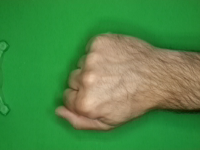

(150, 200, 3)


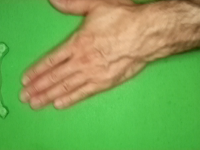

(150, 200, 3)


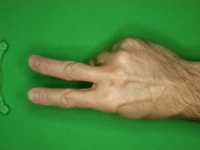

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

for i in os.listdir(base_train_dir):
  path = os.path.join(base_train_dir, i)
  for j in os.listdir(path):
    # img_to_array = cv2.imread(os.path.join(path, j), cv2.IMREAD_GRAYSCALE)
    img = cv2.imread(os.path.join(path, j))
    new_array = cv2.resize(img, (200,150))
    print(new_array.shape)
    show = cv2_imshow(new_array)
    break

In [4]:
training_data = []
test_data = []

for i in os.listdir(base_train_dir):
  path = os.path.join(base_train_dir, i)
  for j in os.listdir(path):
    training_data.append(j)

for i in os.listdir(base_test_dir):
  path = os.path.join(base_test_dir, i)
  for j in os.listdir(path):
    test_data.append(j)

In [5]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=20, horizontal_flip=True, shear_range=0.2)
train_generator = train_datagen.flow_from_directory(base_train_dir, target_size=(150,200), batch_size=64, class_mode="categorical")

test_datagen = ImageDataGenerator(rescale=1/255, rotation_range=20, horizontal_flip=True, shear_range=0.2)
test_generator = test_datagen.flow_from_directory(base_test_dir, target_size=(150,200), batch_size=64, class_mode="categorical")

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy")>0.99):
            print(" Reached 99% Accuracy")
            self.model.stop_training = True
            
callbacks = myCallback()

model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,200,3)),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
        tf.keras.layers.MaxPool2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(3, activation="softmax")
])

In [7]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 50048)             0

In [9]:
from time import time
t1 = time()
History = model.fit(train_generator, validation_data=test_generator, epochs=30, callbacks=[callbacks])

Epoch 1/30
21/21 [==============================] - 24s 1s/step - loss: 1.3453 - accuracy: 0.4878 - val_loss: 0.8187 - val_accuracy: 0.6518
Epoch 2/30
21/21 [==============================] - 23s 1s/step - loss: 0.7339 - accuracy: 0.7027 - val_loss: 0.5092 - val_accuracy: 0.8425
Epoch 3/30
21/21 [==============================] - 23s 1s/step - loss: 0.3909 - accuracy: 0.8659 - val_loss: 0.3710 - val_accuracy: 0.8836
Epoch 4/30
21/21 [==============================] - 23s 1s/step - loss: 0.2897 - accuracy: 0.8941 - val_loss: 0.2696 - val_accuracy: 0.9178
Epoch 5/30
21/21 [==============================] - 24s 1s/step - loss: 0.2065 - accuracy: 0.9306 - val_loss: 0.2449 - val_accuracy: 0.9189
Epoch 6/30
21/21 [==============================] - 23s 1s/step - loss: 0.1891 - accuracy: 0.9352 - val_loss: 0.2316 - val_accuracy: 0.9224
Epoch 7/30
21/21 [==============================] - 24s 1s/step - loss: 0.1626 - accuracy: 0.9474 - val_loss: 0.1980 - val_accuracy: 0.9372
Epoch 8/30
21/21 [==

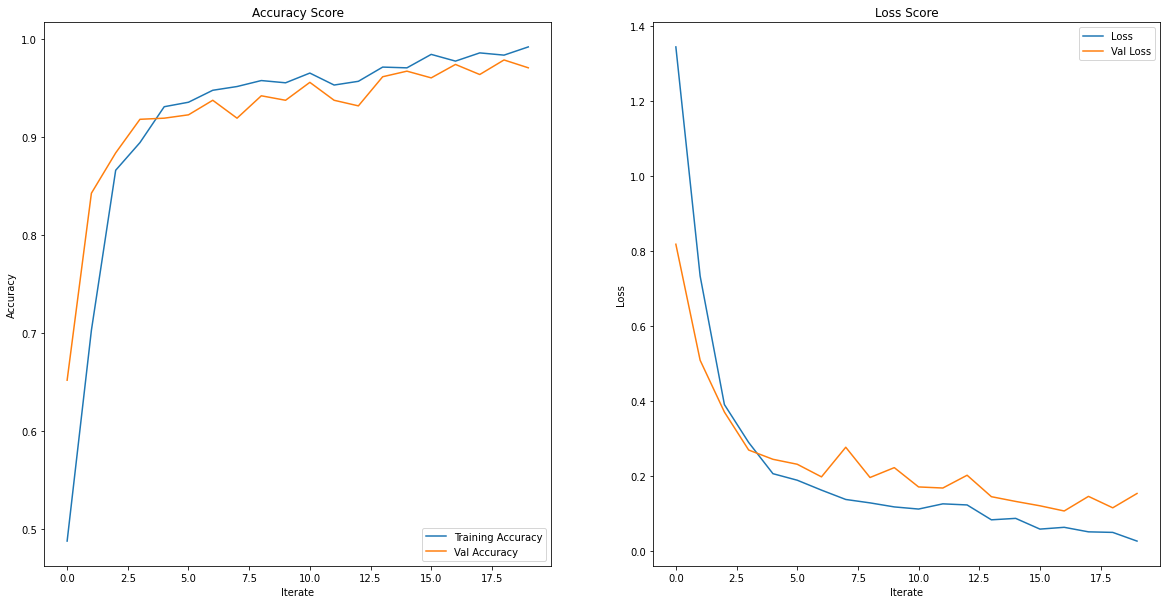

In [57]:
acc = History.history["accuracy"]
val_acc = History.history["val_accuracy"]

loss = History.history["loss"]
val_loss = History.history["val_loss"]

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Accuracy Score")
plt.plot(range(len(acc)), acc, label="Training Accuracy")
plt.plot(range(len(val_acc)), val_acc, label="Val Accuracy")
plt.xlabel("Iterate")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.title("Loss Score")
plt.plot(range(len(loss)), loss, label="Loss")
plt.plot(range(len(val_loss)), val_loss, label="Val Loss")
plt.xlabel("Iterate")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

In [10]:
print(f"Training Time: {round(time() - t1,2)} s")

Training Time: 490.84 s


In [11]:
print(f"Training Time: {round(round(time()-t1,2)/60,2)} min")

Training Time: 8.18 min


In [13]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
 
file = files.upload()

Saving 1UXuUYJ4rVj2eSvt.png to 1UXuUYJ4rVj2eSvt (4).png


Image 1UXuUYJ4rVj2eSvt.png: Rock


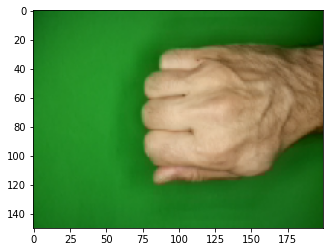

In [22]:
 for i in file.keys():
  path = i
  img_test = image.load_img(path, target_size=(150,200))
  show_img_test = plt.imshow(img_test)
  x = image.img_to_array(img_test)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict_classes(images, batch_size=10)

  if classes[0] == 0:
    print(f"Image {path}: Paper")
  elif classes[0] == 1:
    print(f"Image {path}: Rock")
  else:
    print(f"Image {path}: Scissors") 